In [13]:
import torch
import random
import numpy as np  # numpy
import torch.nn as nn  # nn objects
import torch.optim as optim  # nn optimizers
import matplotlib.pyplot as plt
%matplotlib notebook

## custom packages ##
from networkUtils import recurrentNet as rn
from taskUtils import generate as gen
from trainUtils import trainer as tn
from testUtils import test, plot

# Set device to gpu if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
# Hyperparameters
input_size = 5
num_classes = 2  # the number of units in the output layer
hidden_size = 10  # the number of units in the recurrent layer
batch_size = 1  # batch size = # of samples to average when computing gradient
num_layers = 1  # number of stacked RNN layers
eta = 0.001  # learning rate
epochs = 500  # epochs = # of full pases through dataset

In [15]:
# creating the networks
# general_net = net1 = net2 = net3 = net4 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net1 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net2 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net3 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net4 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)

# Loss function, optimizer, and schedule (for decaying learning rate)
criterion = nn.CrossEntropyLoss()  # loss function

# general_optimizer = optimizer1 = optimizer2 = optimizer3 = optimizer4 = optim.Adam(general_net.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer1 = optim.Adam(net1.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer2 = optim.Adam(net2.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer3 = optim.Adam(net3.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer4 = optim.Adam(net4.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta

sheduler1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer1, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs
sheduler2 = optim.lr_scheduler.ReduceLROnPlateau(optimizer2, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs
sheduler3 = optim.lr_scheduler.ReduceLROnPlateau(optimizer3, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs
sheduler4 = optim.lr_scheduler.ReduceLROnPlateau(optimizer4, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs

# generate takes in inputs of: same_distractions, input_size, seqlen1, seqlen2, seqlen3
dataset1, targets1, sequence_length1 = gen.generate_dataset(False, input_size, 1, 2, 3) # smallest
dataset2, targets2, sequence_length2 = gen.generate_dataset(False, input_size, 10, 15, 20) # bigger
dataset3, targets3, sequence_length3 = gen.generate_dataset(False, input_size, 25, 50, 100) # even bigger
dataset4, targets4, sequence_length4 = gen.generate_dataset(False, input_size, 50, 100, 200) # largest

In [16]:
# trainer takes in inputs of: network, dataset, targets, sequence_length, input_size, batch_size, epochs, optimizer, criterion, sheduler
print("First network: \n")
loss1 = tn.train_network(net1, dataset1, targets1, sequence_length1, input_size, batch_size, epochs, optimizer1, criterion, sheduler1)
print("\nSecond network: \n")
loss2 = tn.train_network(net2, dataset2, targets2, sequence_length2, input_size, batch_size, epochs, optimizer2, criterion, sheduler2)
print("\nThird network: \n")
loss3 = tn.train_network(net3, dataset3, targets3, sequence_length3, input_size, batch_size, epochs, optimizer3, criterion, sheduler3)
print("\nFourth network: \n")
loss4 = tn.train_network(net4, dataset4, targets4, sequence_length4, input_size, batch_size, epochs, optimizer4, criterion, sheduler4)

First network: 

Cost at epoch 0 is 0.695906937122345
Cost at epoch 125 is 0.034305423498153687
Cost at epoch 250 is 0.006669407710433006
Cost at epoch 375 is 0.0028027952648699284
Cost at epoch 499 is 0.0015151085099205375

Second network: 

Cost at epoch 0 is 0.767433226108551
Cost at epoch 125 is 0.025942537933588028
Cost at epoch 250 is 0.00645883334800601
Cost at epoch 375 is 0.002922342624515295
Cost at epoch 499 is 0.0016415752470493317

Third network: 

Cost at epoch 0 is 0.6595840454101562
Cost at epoch 125 is 0.05267145112156868
Cost at epoch 250 is 0.008095741271972656
Cost at epoch 375 is 0.0030424620490521193
Cost at epoch 499 is 0.001659625442698598

Fourth network: 

Cost at epoch 0 is 0.7003699541091919
Cost at epoch 125 is 0.06228218600153923
Cost at epoch 250 is 0.010135303251445293
Cost at epoch 375 is 0.003897652495652437
Cost at epoch 499 is 0.0021949284709990025


<IPython.core.display.Javascript object>


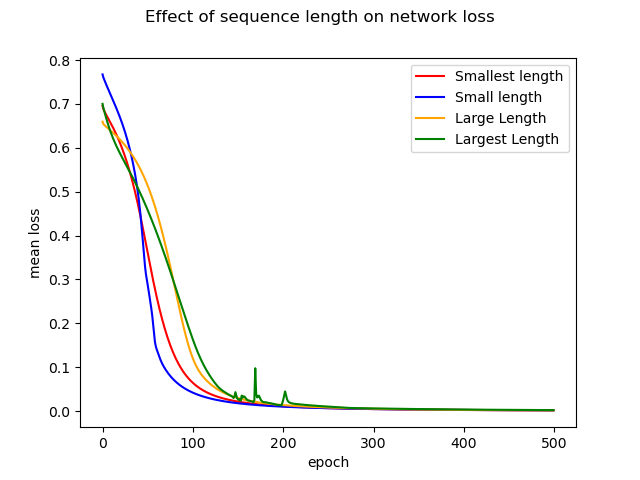

In [17]:
# plot losses
plot.plot_four_losses("Effect of sequence length on network loss", 
                 loss1, loss2, loss3, loss4)
plt.legend(["Smallest length", "Small length", "Large Length", "Largest Length"])
plt.show()

In [18]:
# Tests rounded network outputs against correct network outputs based on sample
# test takes in inputs of: sample_number, dataset, targets, network, input_size, batch_size, sequence_length
test.test_network(random.randint(0, 3), dataset1, targets1, net1, input_size, batch_size, sequence_length1)



Test of network: 
input is [[[0.08046621 0.21603441 0.5862324  0.7409766  0.6582835 ]
  [1.         0.         0.         0.         0.        ]
  [0.45988    0.49582475 0.59571904 0.6314592  0.10658562]
  [0.27809882 0.44610393 0.14255756 0.59573984 0.53740895]
  [1.         0.         0.         0.         0.        ]
  [0.6552965  0.6830338  0.12869465 0.40024757 0.6873593 ]
  [0.28399336 0.75114393 0.00306284 0.4712134  0.7345282 ]
  [0.35997152 0.44538933 0.6211419  0.834606   0.26412976]]]
out is [[1. 0.]]
expected out is [0. 1.]
